# Code/Graph Progress
1. DONE
2. DONE
3. DONE
4. DONE
5. DONE
6. DONE
7. DONE
8. DONE
9. N/A

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LOAD DATA
Need to convert to SI

In [16]:
df = pd.read_csv('460lab3abx.csv') # read in data
df
# Velocity data from sheet in lab
# velocities = np.array([99.8522, 99.4136, 99.7461, 100.087,\
#                        100.496, 100.147, 99.852, 100.09,\
#                        99.182, 100.488, 100.008, 100.305,\
#                        99.2348, 99.7946, 99.7679, 99.9649,\
#                        100.2841, 100.357, 100.291, 100.147,\
#                        99.837, 99.7161, 99.4411])

# side_data[('Velocity', '[ft/s]')] = velocities
# side_data.sort_values(by=[(' AOA', ' [deg]')], inplace=True)
# side_data.drop_duplicates(subset=(' AOA', ' [deg]'), inplace=True)
# side_data.drop(index=1, inplace=True) # dropping the row associated with aoa = -8 as it messes up the scale on the data
# side_data


,Data Point,Valve Position %,Stagnation Pressure [psia],Load Cell [lbf]
0,1,2.0,17.14,0.127
1,2,4.0,18.87,0.220
2,3,6.0,20.76,0.311
3,4,12.0,27.54,0.605
4,5,20.0,36.47,0.962
5,6,25.0,42.26,1.193
6,7,35.0,54.14,1.684
7,8,50.0,70.36,2.355


In [52]:
np.array(df.iloc[:,3].values.flatten().tolist())*4.44822# convert to newtons

array([ 0.56492394,  0.9786084 ,  1.38339642,  2.6911731 ,  4.27918764,
        5.30672646,  7.49080248, 10.4755581 ])

In [74]:
gamma = 1.4
R = 287.05 #si
D = 0.2/39.37/2 #m
A_exit = np.pi*(D)**2 #unsure about this one, this is in inches
P_amb = 14.88*6894.76 #si
T_amb = 295 #Kelvin
stag_P = np.array(df.iloc[:,2].values.flatten().tolist())*6894.76

### 2a Bernoulli constant pressure

In [75]:
rho = P_amb/(R*T_amb)
print(rho) #in slugs
v_exit_const_rho = np.sqrt(2*(stag_P-P_amb)/rho)
# stag_P-P_amb
print(v_exit_const_rho)
#p_exit = atmospheric
# Thr_const_rho = 2*(stag_P-P_amb)*A_exit
Thr_const_rho = rho*v_exit_const_rho**2 * A_exit
print(np.sqrt(gamma*R*T_amb))
Thr_const_rho

1.211553279266885
[160.38270552 213.10309816 258.69734933 379.59472499 495.71223368
 558.23882465 668.46467735 794.64204848]
344.313302095635


array([ 0.63165019,  1.11517003,  1.64340846,  3.53835903,  6.03421576,
        7.65247   , 10.97282587, 15.5061737 ])

### 2b Isentropic flow

In [98]:
M_exit = np.sqrt((2./(1.4-1.))*((stag_P/P_amb)**((gamma-1)/gamma) -1))
print(M_exit)
T_0stag = 295 #kelvin
T_exit = T_0stag/(1 + (gamma-1)/2 * M_exit**2)
V_exit = M_exit*np.sqrt(gamma*R*T_exit)
P_exit = P_amb*(1 + (gamma-1)/2 * M_exit**2)**(gamma/(gamma-1))
# rho_exit = P_exit/(R*T_exit)
rho_exit = P_amb/(R*T_exit)
print(rho_exit) #1.4 to 8.9 (should be 1.2 to 4.7)
# Thr_isen = (P_exit-P_amb)*A_exit + (V_exit**2)*rho_exit*A_exit
Thr_isen = (V_exit**2)*rho_exit*A_exit
print(Thr_isen)
print(T_exit) #good
print(V_exit) #153 -460, shoudl be 169
print(P_exit)
# rho_exit

[0.45401682 0.59257628 0.70646696 0.98058426 1.20815341 1.31810203
 1.49383807 1.67145954]
[1.26150108 1.29663985 1.33248945 1.444546   1.56523831 1.63254211
 1.75228215 1.88851522]
[0.60008539 1.02225133 1.45295736 2.7992327  4.24926026 5.05786488
 6.49645165 8.1331897 ]
[283.31978632 275.64185739 268.22592626 247.41906279 228.34108689
 218.92741103 203.96727601 189.25355434]
[153.19803313 197.22394342 231.94500442 309.203422   365.97962655
 390.96861337 427.68750736 460.95728715]
[118176.1864 130104.1212 143135.2176 189881.6904 251451.8972 291372.5576
 373282.3064 485115.3136]


### 2c Choked flow

This means flow at nozzle will always be at Mach = 1 due to choking

In [104]:
# print(T_exit-T_0stag/1.20)
V_ex_choked = V_exit.copy()
T_ex_choked = T_exit.copy()
P_ex_choked = P_amb*np.ones_like(V_ex_choked)
Thr_choked = Thr_isen.copy()
rho_ex_choked = rho_exit.copy()

for i in range(len(stag_P)):
    # print("foo")
    if M_exit[i]>1.:
        # print(i)
        T_ex_choked[i] = T_0stag/1.20
        V_ex_choked[i] = np.sqrt(gamma*R*T_ex_choked[i])
        P_ex_choked[i] = stag_P[i]/1.893
        rho_ex_choked[i] = P_ex_choked[i]/(R*T_ex_choked[i])
print(T_ex_choked)
print(rho_ex_choked)
print(V_ex_choked)
Thr_choked = (P_ex_choked-P_amb)*A_exit + (V_ex_choked**2)*rho_ex_choked*A_exit
print(Thr_choked)

[283.31978632 275.64185739 268.22592626 247.41906279 245.83333333
 245.83333333 245.83333333 245.83333333]
[1.26150108 1.29663985 1.33248945 1.444546   1.88237429 2.1812212
 2.79439934 3.63158362]
[153.19803313 197.22394342 231.94500442 309.203422   314.31360401
 314.31360401 314.31360401 314.31360401]
[ 0.60008539  1.02225133  1.45295736  2.7992327   4.38210365  5.40793835
  7.51275982 10.38651439]


In [105]:
thrusts = pd.DataFrame({
    'Stag press (Pa)' : stag_P,
    'Thrust_load (N)' : np.array(df.iloc[:,3].values.flatten().tolist())*4.44822,
    'Thrust_bern (N)' : Thr_const_rho,
    'Thrust_isen (N)' : Thr_isen,
    'Thrust_choked (N)' : Thr_choked
})
df.join(thrusts)


,Data Point,Valve Position %,Stagnation Pressure [psia],Load Cell [lbf],Stag press (Pa),Thrust_load (N),Thrust_bern (N),Thrust_isen (N),Thrust_choked (N)
0,1,2.0,17.14,0.127,118176.1864,0.564924,0.631650,0.600085,0.600085
1,2,4.0,18.87,0.220,130104.1212,0.978608,1.115170,1.022251,1.022251
2,3,6.0,20.76,0.311,143135.2176,1.383396,1.643408,1.452957,1.452957
3,4,12.0,27.54,0.605,189881.6904,2.691173,3.538359,2.799233,2.799233
4,5,20.0,36.47,0.962,251451.8972,4.279188,6.034216,4.249260,4.382104
5,6,25.0,42.26,1.193,291372.5576,5.306726,7.652470,5.057865,5.407938
6,7,35.0,54.14,1.684,373282.3064,7.490802,10.972826,6.496452,7.512760
7,8,50.0,70.36,2.355,485115.3136,10.475558,15.506174,8.133190,10.386514


Text(0, 0.5, 'Jet thrust (N)')

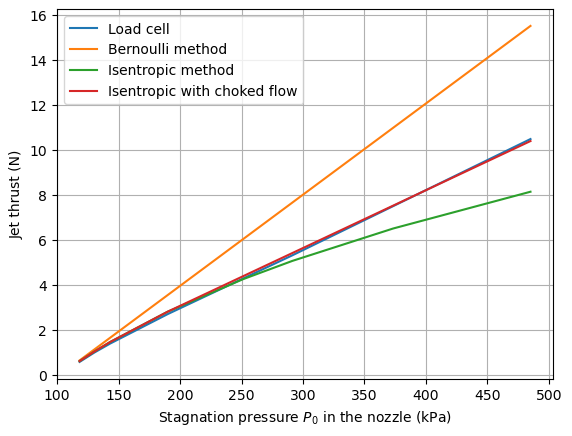

In [111]:
plt.plot(stag_P/1e3,np.array(df.iloc[:,3].values.flatten().tolist())*4.44822, label = "Load cell")
plt.plot(stag_P/1e3,Thr_const_rho, label = "Bernoulli method")
plt.plot(stag_P/1e3,Thr_isen, label = 'Isentropic method')
plt.plot(stag_P/1e3,Thr_choked, label = 'Isentropic with choked flow')
plt.legend()
plt.grid()
plt.xlabel("Stagnation pressure $P_0$ in the nozzle (kPa)")
plt.ylabel("Jet thrust (N)")

In [4]:
main_data = pd.read_csv('460lab2abx_taps.csv', header=[0, 1])
main_data.drop('x/c', axis=1, level=0, inplace=True)
main_data.drop(main_data.columns[[-1]], axis=1, inplace=True) # dropping last column because it is not read in properly for some reason
main_data.drop(index=1, inplace=True) # dropping the row associated with aoa = -8
main_data.sort_values(by=(' AOA', ' [deg]'), inplace=True)
main_data.drop_duplicates(subset=(' AOA', ' [deg]'), inplace=True)

aoas = main_data[' AOA'].values

# main_data

Plotting the tap cordinates for sanity check

In [5]:

# xs = []
# ys = []
# preasures = []
# for i, col in enumerate(main_data.columns.values[1:]):
#     xs.append(float(col[0]))
#     ys.append(float(col[1]))
# xs.append(xs[0])
# ys.append(ys[0])
# for i, row in enumerate(aoas):
#     p = main_data.iloc[i, 1:].values.flatten().tolist()
#     preasures.append(p)
# preasures = np.array(preasures)

# plt.figure(figsize=(10, 6))
# plt.plot(xs, ys, marker='o', linestyle='-')
# for i, txt in enumerate(zip(xs, ys)):
#     plt.annotate(f'({txt[0]}, {txt[1]})', (xs[i], ys[i]), textcoords="offset points", xytext=(0,10), ha='center')
# plt.xlabel('X values')
# plt.ylabel('Y values')
# plt.title('Plot of xs and ys with labels')
# plt.grid(True)
# plt.show()

# # delting from global namespace because the data was manipulated to produce a good plot
# # these should not be use because they do not represent the read data
# del([xs, ys])

# Question 1

In [6]:
coords = np.array(main_data.columns.values[1:]) # Excludes the aoa column
pressure_data = main_data.iloc[:, 1:].values # Excludes the aoa column
# pressure_data = pressure_data
# pressure_data.shape, coords.shape
# q_corrected = side_data[' q_WT corrected'].values[1:]
q_corrected = side_data[' q_WT corrected'].values
Cns = []
Cas = []
Cm_LExs = []
Cm_LEys = []
Cls = []
Cmc4 = []
for i, aoa in enumerate(aoas.flatten()):
    cn_temp = 0.0
    ca_temp = 0.0
    cm_LEx = 0.0
    cm_LEy = 0.0
    for j, tap_coord in enumerate(coords[:len(coords) - 1]):
        x, y = tap_coord
        x = float(x)
        y = float(y)
        p = pressure_data[i, j]
        cp = p / q_corrected[i]
        cp1 = pressure_data[i, j + 1] / q_corrected[i]
        cn_temp += 0.5 * (cp + cp1) * (float(coords[j+1][0]) - x)
        ca_temp += 0.5 * (cp + cp1) * (float(coords[j+1][1]) - y)
        cm_LEx += 0.5 * (cp*x + cp1 * float(coords[j+1][0])) * (x- float(coords[j+1][0]))
        cm_LEy += 0.5 * (cp*y + cp1 * float(coords[j+1][1])) * (y- float(coords[j+1][1]))

    Cns.append(cn_temp)
    Cas.append(-ca_temp)
    Cm_LExs.append(cm_LEx)
    Cm_LEys.append(cm_LEy)
    Cls.append(cn_temp * np.cos(np.radians(aoa)) - ca_temp * np.sin(np.radians(aoa)))
    Cmc4.append(cm_LEx + cm_LEy + 0.25*Cls[-1])

Cns = np.array(Cns)
Cas = np.array(Cas)
Cm_LExs = np.array(Cm_LExs)
Cm_LEys = np.array(Cm_LEys)
Cls = np.array(Cls)
Cmc4 = np.array(Cmc4)


# Create a dictionary with the calculated data
data_dict = {
    'AOA [deg]': aoas.flatten(),
    'Cn': Cns.flatten(),
    'Ca': Cas.flatten(),
    'Cm_LEx': Cm_LExs.flatten(),
    'Cm_LEy': Cm_LEys.flatten(),
    'Cl': Cls.flatten(),
    'Cm_c/4': Cmc4.flatten()
}

# Create a DataFrame from the dictionary
calculated_data_df = pd.DataFrame(data_dict)

# Set the angle of attack as the index
calculated_data_df.set_index('AOA [deg]', inplace=True)

# Display the DataFrame
calculated_data_df

,Cn,Ca,Cm_LEx,Cm_LEy,Cl,Cm_c/4
AOA [deg],,,,,,
-6.0,-0.014152,0.041868,-0.017150,0.001906,-0.018451,-0.019857
-4.0,0.134977,0.048429,-0.072006,0.001155,0.131270,-0.038033
-2.0,0.272230,0.045550,-0.114147,0.000124,0.270474,-0.046404
0.0,0.441696,0.029247,-0.166653,-0.001298,0.441696,-0.057527
2.0,0.614011,0.003578,-0.224711,-0.002750,0.613762,-0.074021
4.0,0.773583,-0.026630,-0.274905,-0.004333,0.769841,-0.086777
6.0,0.939348,-0.067638,-0.326669,-0.006125,0.927132,-0.101011
8.0,1.066426,-0.117156,-0.359581,-0.007927,1.039742,-0.107572
10.0,1.187120,-0.168946,-0.392057,-0.009550,1.139748,-0.116670


# Question 2

In [7]:
data = side_data.copy()

chord_length = 3.5 / 12 # convert inches to feet

# density caluculated using ideal gas law
density = (side_data[' AmbPress'].values*144) / (1716 * side_data[' AmbTemp'].values)
V = side_data['Velocity'].values

# viscocity calculated using fomula from Prof Merret's 442 lecture slides
viscocity = (2.2697e-8 * side_data[' AmbTemp'].values**(3/2)) / (side_data[' AmbTemp'].values + 198.72)
R = (density * V * chord_length) / viscocity
data[('Calculated Reynolds #', '[ND]')] = R

mach = side_data['Velocity'].values / (np.sqrt(1.4*1716*side_data[' AmbTemp'].values))
data[('Mach Number', '[ND]')] = mach

data.drop(columns=data.columns[2:5], inplace=True)

data

,AOA,q_WT corrected,Reynolds #,Velocity,Calculated Reynolds #,Mach Number
,[deg],[psid],[ND],[ft/s],[ND],[ND]
0,-6.0,0.078503,173683.5313,99.8522,173681.830785,0.088460
2,-4.0,0.077843,172951.9219,99.7461,173497.281599,0.088366
3,-2.0,0.078539,173722.6094,100.0870,174090.239351,0.088668
4,0.0,0.080270,175627.2344,100.4960,174801.649503,0.089030
5,2.0,0.076241,171162.1719,100.1470,174194.602699,0.088721
6,4.0,0.079710,175013.7031,99.8520,173681.482907,0.088460
7,6.0,0.080170,175517.8594,100.0900,174095.457519,0.088670
8,8.0,0.077478,172545.9688,99.1820,172516.092193,0.087866
9,10.0,0.079506,174788.6094,100.4880,174787.734390,0.089023


In [8]:
# Setup for following questions
coords = np.array(main_data.columns.values[1:])
Cps_top = []
Cps_bottom = []

for i, aoa in enumerate(aoas.flatten()):
    cp_temp_top = []
    cp_temp_bottom = []
    for j, tap_coord in enumerate(coords):
        x, y = tap_coord
        x = float(x)
        y = float(y)
        p = pressure_data[i, j]
        cp = p / q_corrected[i]
        if y >= 0:
            cp_temp_top.append(cp)
        else:
            cp_temp_bottom.append(cp)
    Cps_top.append(cp_temp_top)
    Cps_bottom.append(cp_temp_bottom)

Cps_top = np.array(Cps_top)
Cps_bottom = np.array(Cps_bottom)



# Question 3

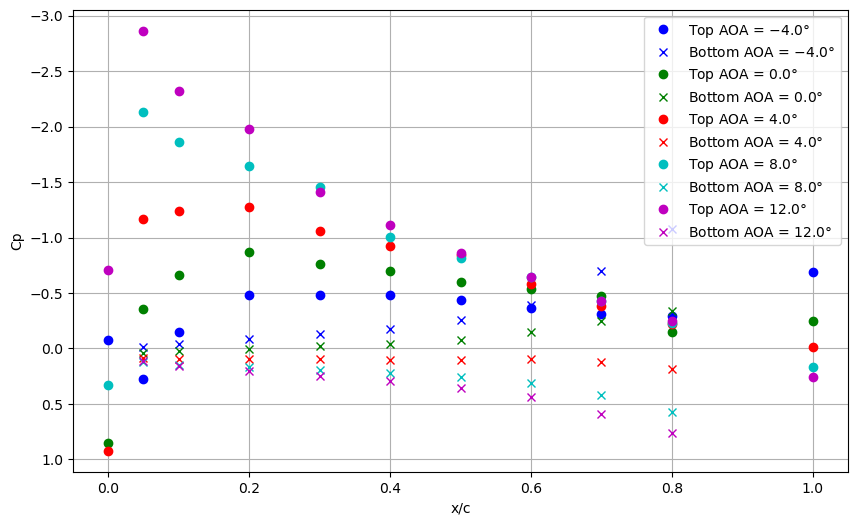

In [9]:
# Define the angles of attack to plot
aoa_idxs_to_plot = [1, 3, 5, 7, 9]
# translate to aoas[-4  0  4 8  12]

# Define a list of colors for each AOA
colors = ['b', 'g', 'r', 'c', 'm']

# Create a figure
plt.figure(figsize=(10, 6))

# Plot Cp values for the specified AOA indexes
for i, idx in enumerate(aoa_idxs_to_plot):
    color = colors[i % len(colors)]
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) >= 0], Cps_top[idx], marker='o', linestyle='', color=color, label=f'Top AOA = ${aoas[idx][0]}\degree$')
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) < 0], Cps_bottom[idx], marker='x', linestyle='', color=color, label=f'Bottom AOA = ${aoas[idx][0]}\degree$')

plt.xlabel('x/c')
plt.ylabel('Cp')
plt.gca().yaxis.set_inverted(True)
# plt.title('Cp vs x/c for different AOAs')
plt.legend()
plt.grid(True)
plt.show()

# Question 4

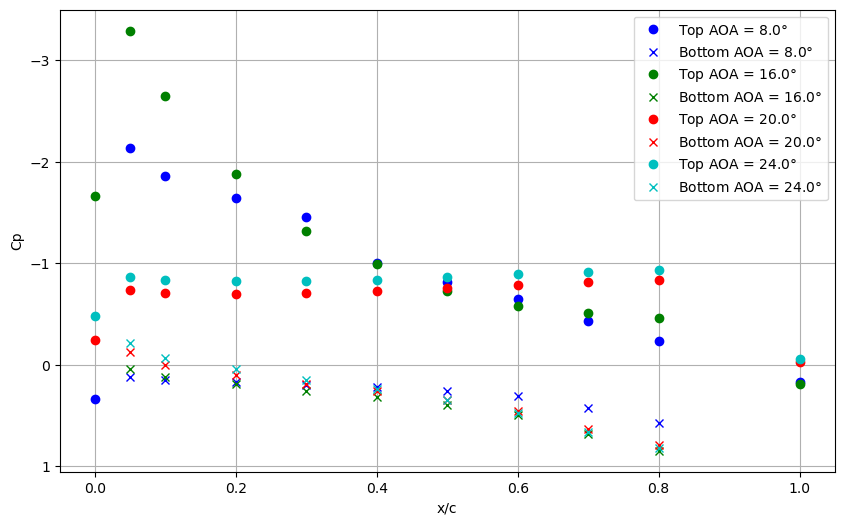

In [10]:
# Define the angles of attack to plot
aoas_to_plot = [8, 16, 20, 24]

# Find the indices corresponding to the specified angles of attack
aoa_indices = [np.where(aoas.flatten() == aoa)[0][0] for aoa in aoas_to_plot]

# Create a figure
plt.figure(figsize=(10, 6))

# Plot Cp values for the specified AOA indexes
for i, idx in enumerate(aoa_indices):
    color = colors[i % len(colors)]
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) >= 0], Cps_top[idx], marker='o', linestyle='', color=color, label=f'Top AOA = ${aoas[idx][0]}\degree$')
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) < 0], Cps_bottom[idx], marker='x', linestyle='', color=color, label=f'Bottom AOA = ${aoas[idx][0]}\degree$')

plt.xlabel('x/c')
plt.ylabel('Cp')
plt.gca().yaxis.set_inverted(True)
# plt.title('Cp vs x/c for different AOAs')
plt.legend()
plt.grid(True)
plt.show()

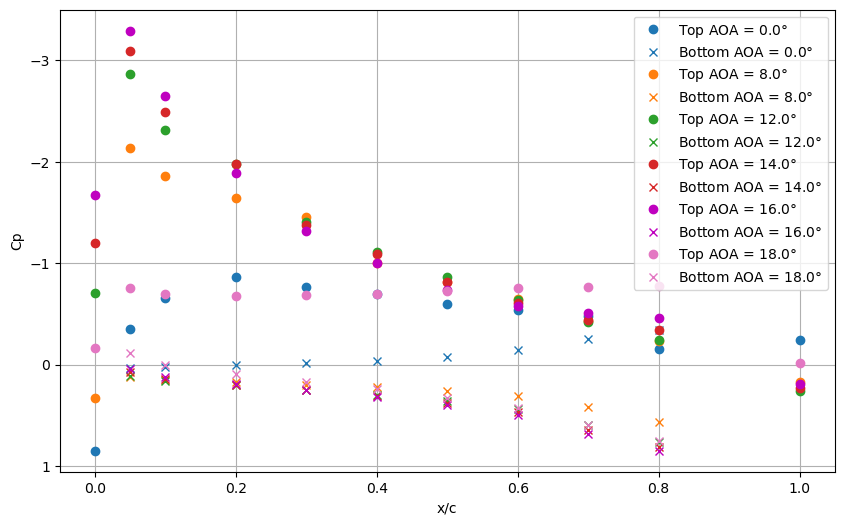

In [23]:
# Define the angles of attack to plot
aoas_to_plot = [0, 8, 12, 14, 16, 18]

# Find the indices corresponding to the specified angles of attack
aoa_indices = [np.where(aoas.flatten() == aoa)[0][0] for aoa in aoas_to_plot]

colors = ['tab:blue','tab:orange','tab:green','tab:red','m','tab:pink','tab:olive','tab:cyan']

# Create a figure
plt.figure(figsize=(10, 6))

# Plot Cp values for the specified AOA indexes
for i, idx in enumerate(aoa_indices):
    color = colors[i % len(colors)]
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) >= 0], Cps_top[idx], marker='o', linestyle='', color=color, label=f'Top AOA = ${aoas[idx][0]}\degree$')
    plt.plot([float(coord[0]) for coord in coords if float(coord[1]) < 0], Cps_bottom[idx], marker='x', linestyle='', color=color, label=f'Bottom AOA = ${aoas[idx][0]}\degree$')

plt.xlabel('x/c')
plt.ylabel('Cp')
plt.gca().yaxis.set_inverted(True)
# plt.title('Cp vs x/c for different AOAs')
plt.legend()
plt.grid(True)
plt.show()

# Question 5

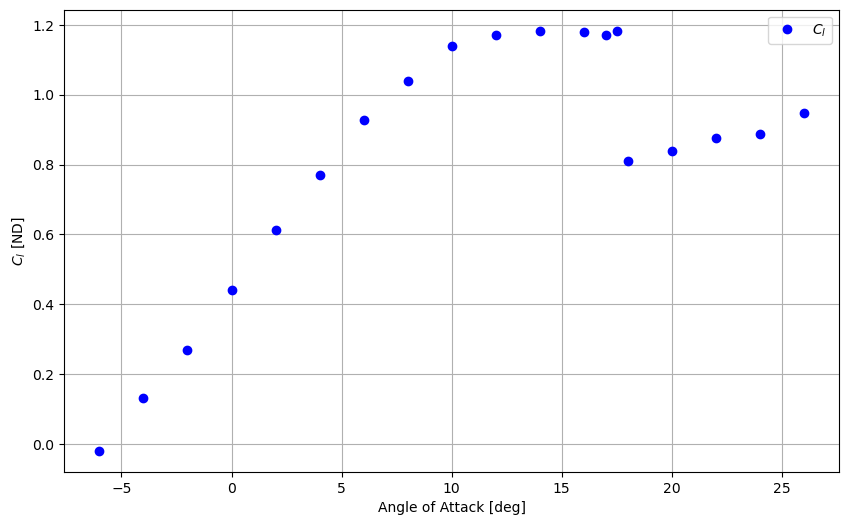

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='b', label='$C_l$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_l$ [ND]')
# plt.title('$C_l$ vs AOA') # TODO: REMOVE BEFORE FLIGHT
plt.legend()
plt.grid(True)
plt.show()

# Question 6

Graphs for Question 6, plot 1 is 100,000 and plot 2 is 200,000 \
Our data is roughly 175,000

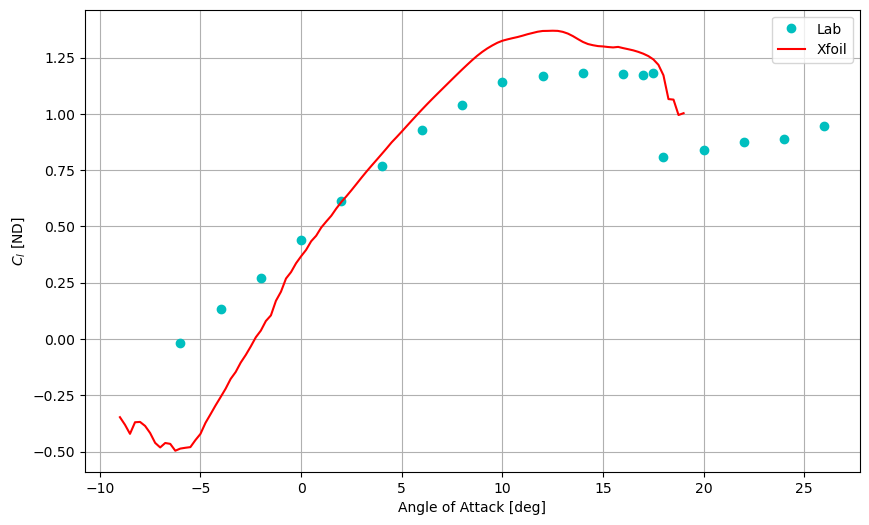

In [12]:
# Data from http://airfoiltools.com/polar/details?polar=xf-clarky-il-100000
# Taken at reynolds 100,000, our data is at reynolds number 175,000
xfoil_data_clarky = pd.read_csv('xf-clarky-il-100000.csv', skiprows=10)
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='c', label='Lab')
plt.plot(xfoil_data_clarky['Alpha'], xfoil_data_clarky['Cl'], color='r', label='Xfoil')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_l$ [ND]')
plt.legend()
plt.grid(True)
plt.show()

Closer Reynolds number use this data

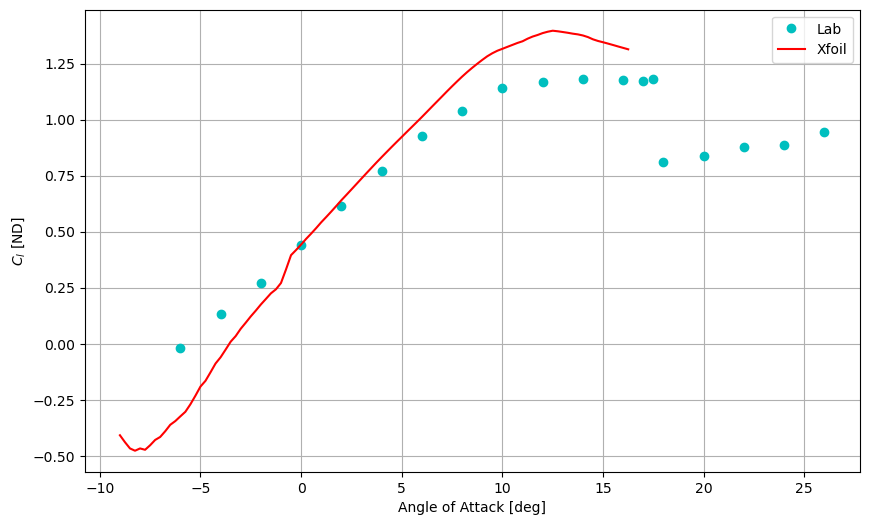

In [13]:
# Data from http://airfoiltools.com/polar/details?polar=xf-clarky-il-200000
# Taken at reynolds 200,000, our data is at reynolds number 175,000
xfoil_data_clarky = pd.read_csv('xf-clarky-il-200000.csv', skiprows=10)
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='c', label='Lab')
plt.plot(xfoil_data_clarky['Alpha'], xfoil_data_clarky['Cl'], color='r', label='Xfoil')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_l$ [ND]')
plt.legend()
plt.grid(True)
# plt.title("C_l vs alpha from xfoil at r=200000") # TODO: Remove before flight
plt.show()

# Question 7

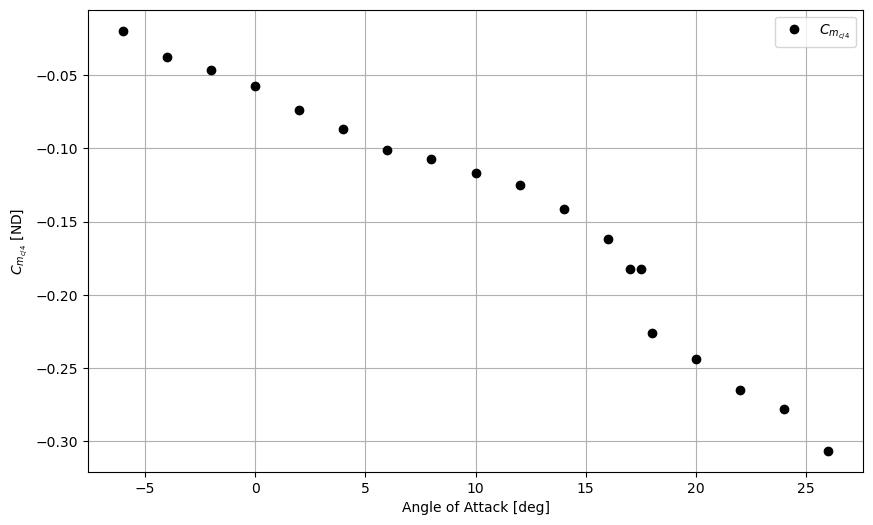

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cmc4, marker='o', linestyle='', color='k', label='$C_{m_{c/4}}$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_{m_{c/4}}$ [ND]')
# plt.title('$C_{m_{c/4}}$ vs AOA')
plt.legend()
plt.grid(True)
plt.show()

# Question 8

Used NACA 2412 and NACA 0012 (Symetric)

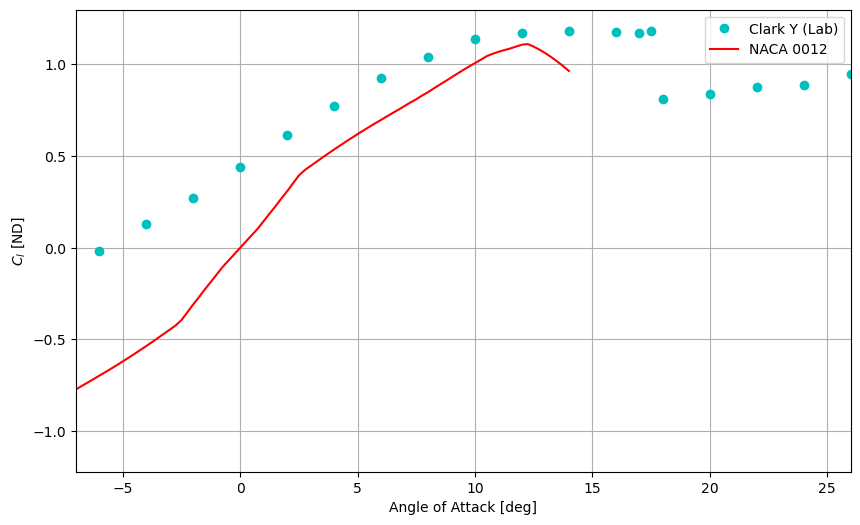

In [15]:
# Data from airfoil tools http://www.airfoiltools.com/polar/details?polar=xf-n0012-il-200000
xfoil_data_0012 = pd.read_csv('xf-n0012-il-200000.csv', skiprows=10)
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='c', label='Clark Y (Lab)')
plt.plot(xfoil_data_0012['Alpha'], xfoil_data_0012['Cl'], color='r', label='NACA 0012')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_l$ [ND]')
plt.xlim(-7, 26)
plt.legend()
plt.grid(True)
# plt.title("C_l vs alpha from naca0012 at r=200000") # TODO: Remove before flight
plt.show()

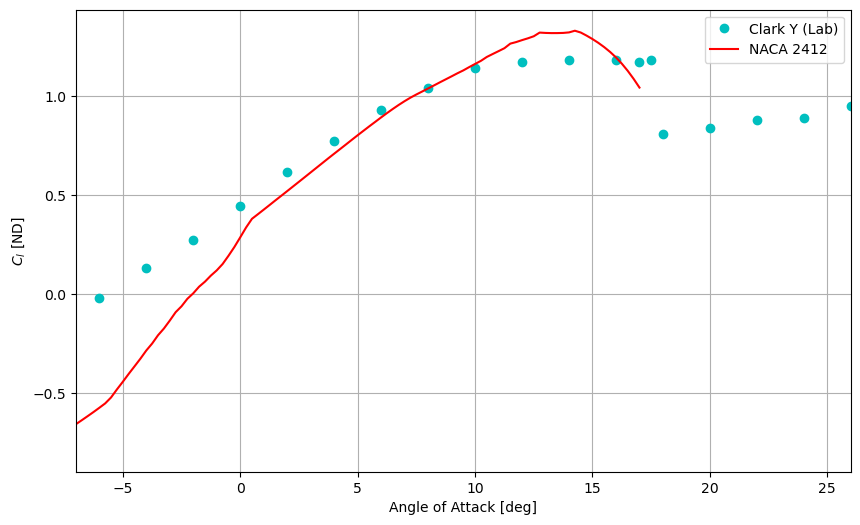

In [16]:
# Dara from airfoil tools http://airfoiltools.com/polar/details?polar=xf-naca2412-il-200000
xfoil_data_2412 = pd.read_csv('xf-naca2412-il-200000.csv', skiprows=10)
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='c', label='Clark Y (Lab)')
plt.plot(xfoil_data_2412['Alpha'], xfoil_data_2412['Cl'], color='r', label='NACA 2412')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_l$ [ND]')
plt.xlim(-7, 26)
plt.legend()
plt.grid(True)
# plt.title("C_l vs alpha from naca2412 at r=200000") # TODO: Remove before flight
plt.show()

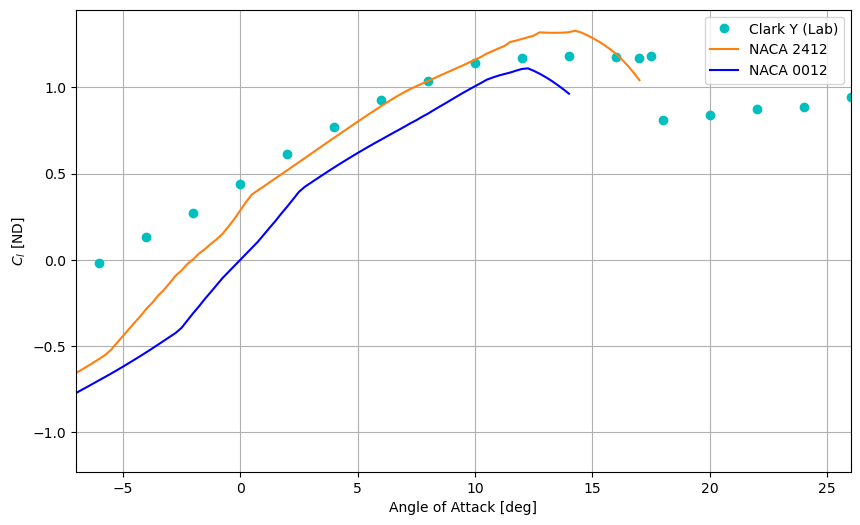

In [17]:
xfoil_data_0012 = pd.read_csv('xf-n0012-il-200000.csv', skiprows=10)
xfoil_data_2412 = pd.read_csv('xf-naca2412-il-200000.csv', skiprows=10)
plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='c', label='Clark Y (Lab)')
plt.plot(xfoil_data_2412['Alpha'], xfoil_data_2412['Cl'], color='tab:orange', label='NACA 2412')
plt.plot(xfoil_data_0012['Alpha'], xfoil_data_0012['Cl'], color='b', label='NACA 0012')
plt.xlabel('Angle of Attack [deg]')
plt.xlim(-7, 26)
plt.ylabel('$C_l$ [ND]')
plt.legend()
plt.grid(True)
# plt.title("C_l vs alpha from naca2412 at r=200000") # TODO: Remove before flight
plt.show()

# Appendix: Plots for everything

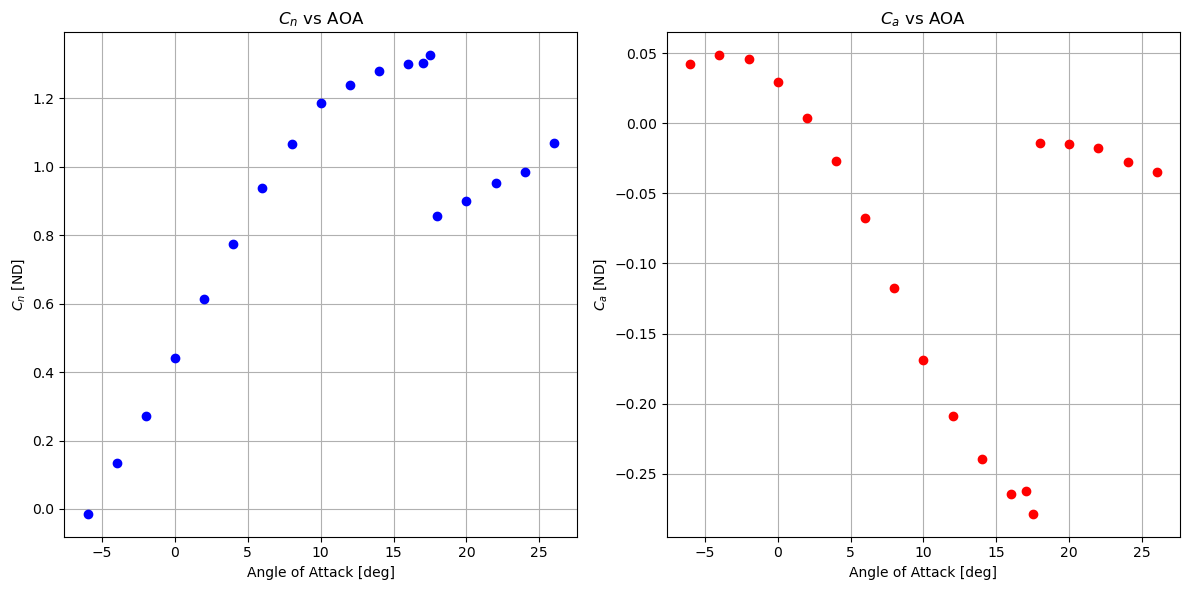

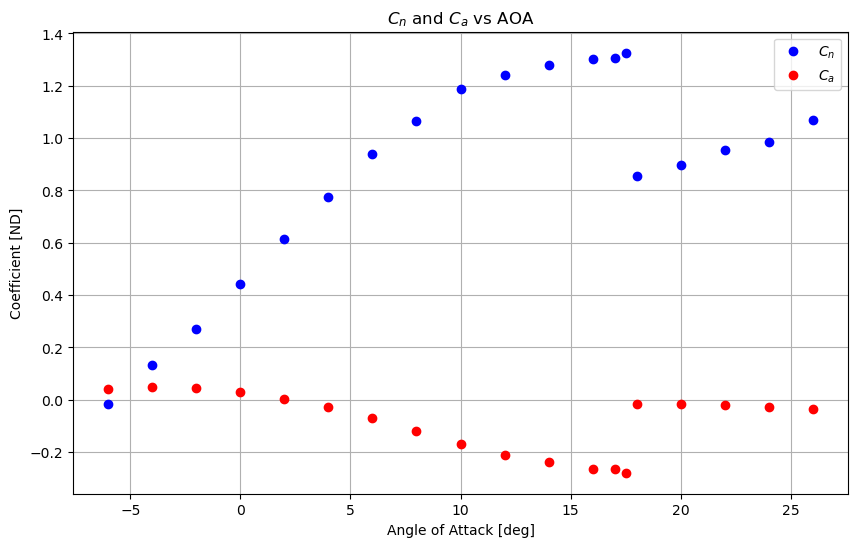

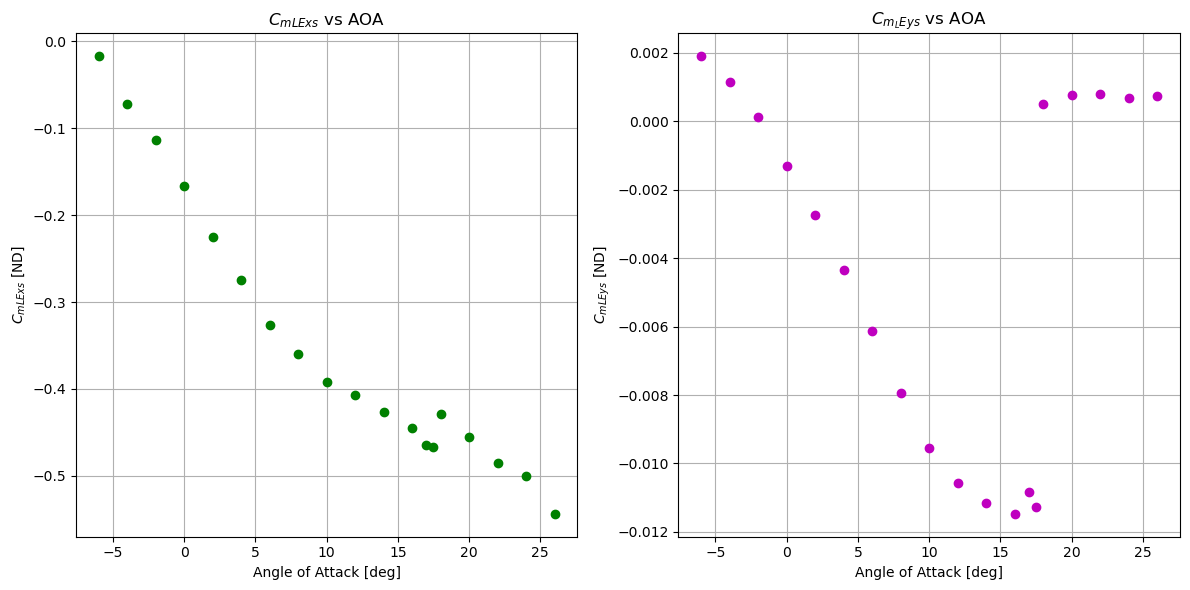

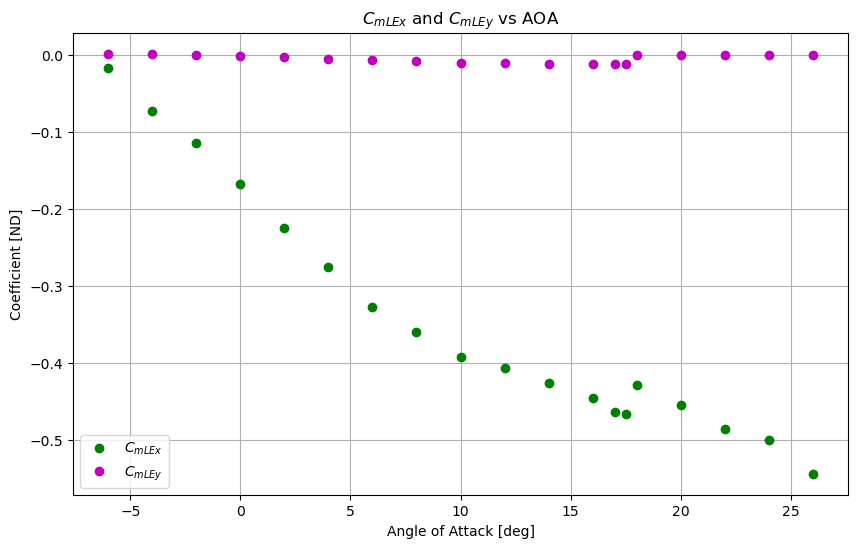

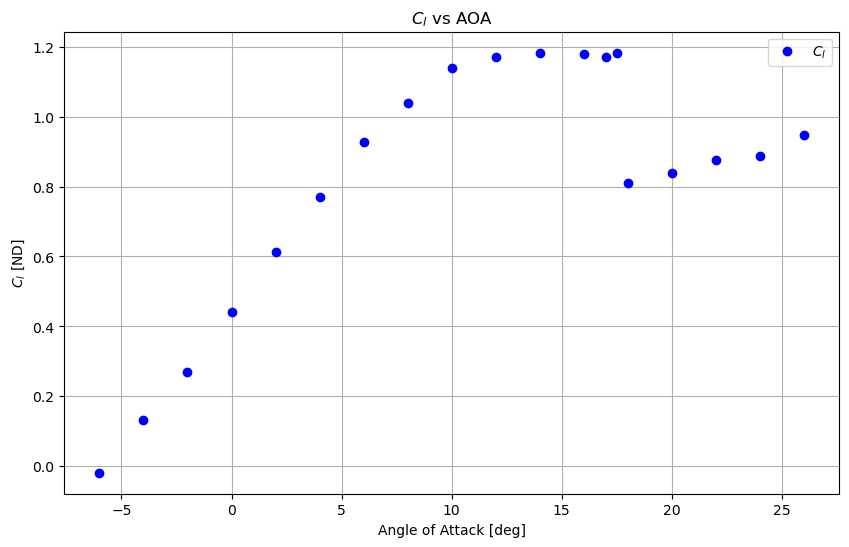

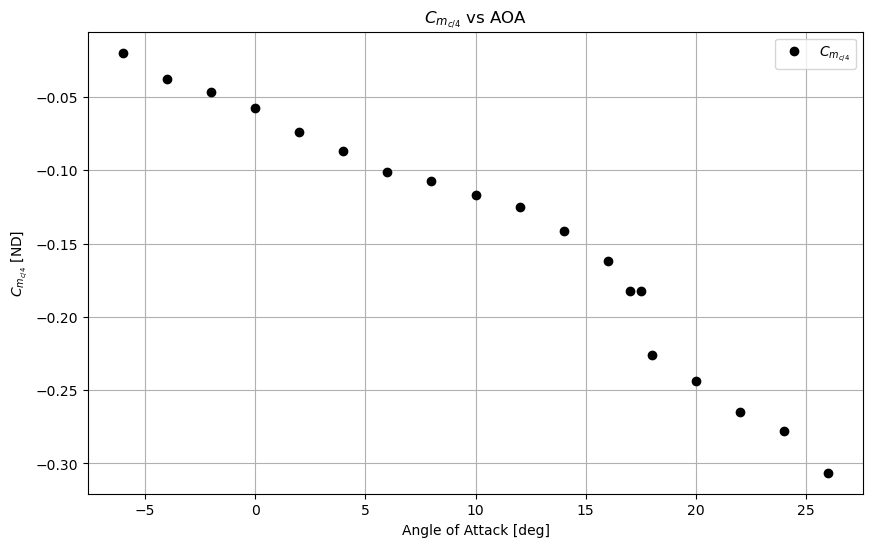

In [18]:
plt.figure(figsize=(12, 6)) 
# Plot Cns vs aoa
plt.subplot(1, 2, 1)
plt.plot(aoas.flatten(), Cns, marker='o', linestyle='', color='b')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_n$ [ND]')
plt.title('$C_n$ vs AOA')
plt.grid(True)

# Plot Cas vs aoa
plt.subplot(1, 2, 2)
plt.plot(aoas.flatten(), Cas, marker='o', linestyle='', color='r')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_a$ [ND]')
plt.title('$C_a$ vs AOA')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cns, marker='o', linestyle='', color='b', label='$C_n$')
plt.plot(aoas.flatten(), Cas, marker='o', linestyle='', color='r', label='$C_a$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('Coefficient [ND]')
plt.title('$C_n$ and $C_a$ vs AOA')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6)) 
# Plot Cm_LExs vs aoa
plt.subplot(1, 2, 1)
plt.plot(aoas.flatten(), Cm_LExs, marker='o', linestyle='', color='g')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_{mLExs}$ [ND]')
plt.title('$C_{mLExs}$ vs AOA')
plt.grid(True)

# Plot Cm_LEys vs aoa
plt.subplot(1, 2, 2)
plt.plot(aoas.flatten(), Cm_LEys, marker='o', linestyle='', color='m')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_{mLEys}$ [ND]')
plt.title('$C_{m_LEys}$ vs AOA')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cm_LExs, marker='o', linestyle='', color='g', label='$C_{mLEx}$')
plt.plot(aoas.flatten(), Cm_LEys, marker='o', linestyle='', color='m', label='$C_{mLEy}$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('Coefficient [ND]')
plt.title('$C_{mLEx}$ and $C_{mLEy}$ vs AOA')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cls, marker='o', linestyle='', color='b', label='$C_l$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_l$ [ND]')
plt.title('$C_l$ vs AOA') # TODO: REMOVE BEFORE FLIGHT
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(aoas.flatten(), Cmc4, marker='o', linestyle='', color='k', label='$C_{m_{c/4}}$')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('$C_{m_{c/4}}$ [ND]')
plt.title('$C_{m_{c/4}}$ vs AOA')
plt.legend()
plt.grid(True)
plt.show()